In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 実験結果データの読み込み
dataset = pd.read_csv('./../data/next_samples_bo_2023-12-07.csv', index_col=0, header=0)

# amino_acid = dataset["アミノ酸(mM)"]
# plt.hist(amino_acid, bins=20)

# mg = dataset["Mg (mM)"]
# plt.hist(mg, bins=20)

# k = dataset["K (mM)"]
# plt.hist(k, bins=20)

# spd = dataset["スペルミジン (mM)"]
# plt.hist(spd, bins=20)

# ntp = dataset["NTP (mM)"]
# plt.hist(ntp, bins=20)

# pga = dataset["3-PGÅ"]
# plt.hist(pga, bins=20)


In [ ]:
# 実験結果をbox plotとjitter plotでチェックする

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 実験結果のCSVファイルを読み込む
df = pd.read_csv("/Users/yamazakihiroto/Documents/東京農業大学/卒論/bayesian-optimization/data/result.csv")

df = df.drop("Unnamed: 0",axis=1)

# データフレームから辞書に変換
data_dict = df.to_dict(orient='list')


# 特定の化学成分（ここでは"Mg (mM)"）に対するボックスプロットとジッタープロット
plt.figure(figsize=(10, 6))
sns.boxplot(x='アミノ酸(mM)', y='Yield', data=data_dict, color='lightblue', showfliers=False)
sns.stripplot(x='アミノ酸(mM)', y='Yield', data=data_dict, color='darkblue', jitter=True)
plt.title('Amino Acid (mM)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Mg (mM)', y='Yield', data=data_dict, color='lightblue', showfliers=False)
sns.stripplot(x='Mg (mM)', y='Yield', data=data_dict, color='darkblue', jitter=True)
plt.title('Mg (mM)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='K (mM)', y='Yield', data=data_dict, color='lightblue', showfliers=False)
sns.stripplot(x='K (mM)', y='Yield', data=data_dict, color='darkblue', jitter=True)
plt.title('K (mM)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='スペルミジン (mM)', y='Yield', data=data_dict, color='lightblue', showfliers=False)
sns.stripplot(x='スペルミジン (mM)', y='Yield', data=data_dict, color='darkblue', jitter=True)
plt.title('Spermidine (mM)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='NTP (mM)', y='Yield', data=data_dict, color='lightblue', showfliers=False)
sns.stripplot(x='NTP (mM)', y='Yield', data=data_dict, color='darkblue', jitter=True)
plt.title('NTP (mM)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='3-PGÅ', y='Yield', data=data_dict, color='lightblue', showfliers=False)
sns.stripplot(x='3-PGÅ', y='Yield', data=data_dict, color='darkblue', jitter=True)
plt.title('3-PGÅ')
plt.show()

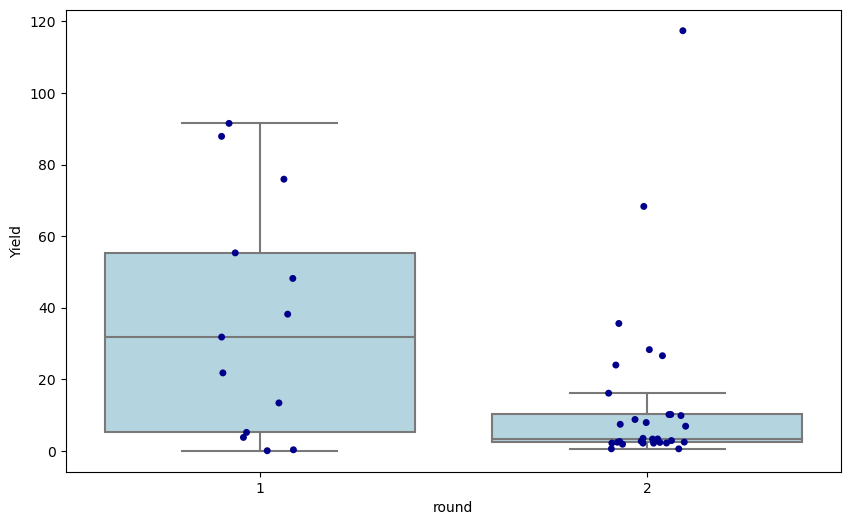

In [47]:
# 各ラウンドごとの終了データを比較する
# 実験結果をbox plotとjitter plotでチェックする

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

files = [
    "/Users/yamazakihiroto/Documents/東京農業大学/卒論/bayesian-optimization/data/result_20231026.csv",
    "/Users/yamazakihiroto/Documents/東京農業大学/卒論/bayesian-optimization/data/result_20231207.csv"
]

# 空のデータフレームを作成
all_data = pd.DataFrame()

# 各ファイルからデータを読み込み、統合する
for i, file in enumerate(files):
    df = pd.read_csv(file)
    df['round'] = f"{i+1}"  # 実験の識別子を追加

    all_data = pd.concat([all_data, df], ignore_index=True)

# 特定の化学成分（ここでは"Mg (mM)"）に対するボックスプロットとジッタープロット
plt.figure(figsize=(10, 6))
sns.boxplot(x='round', y='Yield', data=all_data, color='lightblue', showfliers=False)
sns.stripplot(x='round', y='Yield', data=all_data, color='darkblue', jitter=True)
plt.show()